# Částicové modely plazmatu
## výpočet síly

Přednáška rozebírá metody výpočtu síly v částicových modely plazmatu. Částečně navazuje na: metody řešení Poissonovy rovnice probírané v přednášce NEVF138 (Z. poč. fyz. II) a na základy Particle-in-cell probírané v přednášce NEVF137 (Model. ve fyz. pl.) ale nejsou to prerekvizity.

## komentáře ke slidům Particle-force

### str. 3
Částicový model tedy převádí problém řešení 6D integrodiferenciální Boltzmannovy rovnice na výpočet trajektorií Np částic v 6D fázovém prostoru.

### str. 4
zajímají nás jen konzervativní síly, které lze reprezentovat potenciálem.

Pozn: vícečásticové interakce jsou například polarizační: Indukovaný dipól částice zavisí na působení více častic v okolí...

Dále už nás bude zajímat jenom elektrostatické silové působení, kde výpočet síly je ekvivalentní řešení Poissonovy rovnice. Mimochodem, to platí i pro gravitaci, 

### str. 5
PP metody se v modelování plazmatu prakticky nepoužívají vzhledem ke kolektivnímu chování. Lze použít třeba pro simulaci pevné látky

### str. 7
Příklad: jak lze separovat krátkodosahovou a dalekodosahovou složku coulombické interakce bodových částic?

Dalekodosahovou složku můžeme definovat jako silové působení mezi sférami o poloměru $a/2$ s rovnoměrným rozložením náboje. Ta je pro $r > a$ shodná s interakcí bodových nábojů. Když nahradíme bodový náboj sférou o poloměru $r$, tak dalekodosahovou

In [49]:
import matplotlib.pyplot as plt
import numpy as np

In [50]:
C = 1 # q^2/(4 pi eps0)
a = 1 # radius
x = np.linspace(1e-6, 5, 200)

(0, 4)

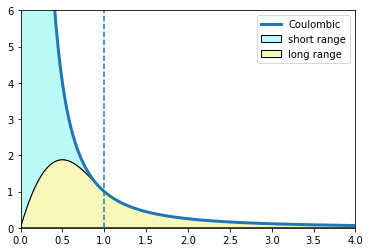

In [51]:
Coulomb = C/x**2
Trunc = Coulomb.copy()
Trunc[x<a] = C/a**2*(8*x/a - 9*x**2/a**2 + 2*x**4/a**4)[x<a]
# Hockney Eastwood  kap. 12

plt.plot(x, Coulomb, lw=3, label="Coulombic")
plt.fill_between(x, Trunc, Coulomb, facecolor="#BBF8F8", edgecolor="k", label="short range")
plt.fill_between(x, 0*x, Trunc, facecolor="#F8F8BB", edgecolor="k", label="long range")
plt.axvline(1, ls="--")
#plt.text(1, 3, )
plt.legend()
plt.ylim(0, 6)
plt.xlim(0, 4)

### str. 8
Stromové algoritmy jsou blízké PP, ale optimalizují výpočet působení vzdálenějších částic

Barnes-Hut: relativně jednoduchý, vysvětlení dále viz slidy

### str. 13

## Makročástice
Důležitá poznámka, která se týká prakticky všech částicových simulací plazmatu (nebo jiných tekutin). Obvykle nedokážeme zahrnout do simulace všechny fyzikální částice - atomy a molekuly. Například počty nabitých částic ve výbojích jsou typicky $\gg 10^{10}$, ale k simulaci často stačí počty v řádech $10^6$ (pro jednoduchou geometrii).

Používáme tedy tzv. makročástice, kde jedna simulovaná částice reprezentuje $n$ reálných částic. Makročástice má náboj $nq$ (ovlivňuje výpočet síly) a stejné $q/m$ jako reálné částice (takže platí stejné pohybové rovnice). Je nefyzikální, aby makročástice interagovaly na krátkou vzdálenost stejně jako bodové náboje (jde spíše o spojité rozložení nábojové hustoty). Proto se silové působení v částicových modelech často vyhlazuje (Použitím změkčené interakce v PP nebo stromových algoritmech a nebo vyhlazováním v PM algoritmech).


### str. 17
Indexy: $i$: čas, $n$: číslo mřížového bodu, $k$ index částice

### str. 18

V particle in cell se typicky používá tvar částice CIC. Náboj částice se lineárně rozpočítá mezi 2 (v 1D) nejbližší mřížové body a síla se potom počítá lineární interpolací z nebližších bodů.

Vysvětlení, proč TSC schéma nemá trojúhelníkovou váhovou funkci: Pokud si představíme, nábojovou hustotu v mřížovém bodě $x_i$ určíme integrací přes $(x_i-h/2, x_i+h/2)$, tak váhová funkce je konvoluce nábojového rozdělení částice a obdélníkové funkce, takže TSC váhová funkce odpovídá "trojúhelníkové" částici a CIC částice jsou "obdélníkové".

### str 21
GS a Jacobi mají stejnou výpočetní náročnost. GS má menší paměťové nároky (pole lze průběžně přepisovat) a je o konstantní faktor rychlejší.

### str. 35
Multigridy jsou prezentovány jen velmi zhruba. V případě zájmu dodám lepší materiály